从Google Drive中导入数据

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1zo_19GCSahf4WmlTH7468OW3oill8Ffi'
downloaded = drive.CreateFile({'id': file_id})
#输入你的文件名字
downloaded.GetContentFile('train.csv')
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1bIAQ-9l_VvLb2dtUaF_n470m77r4_0Sm'
downloaded = drive.CreateFile({'id': file_id})
#输入你的文件名字
downloaded.GetContentFile('test.csv')
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William H

读取数据

In [0]:
import pandas as pd
data=pd.read_csv('train.csv')
print(data.keys())
print(data.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

In [0]:
import pandas as pd
def read_dataset(path):
    #read input from path
    data=pd.read_csv(path,index_col=0)
    #get rid of the column that we dont need
    data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)#删列axis=1
    #deal with 'Sex' male->1 female->0
    data['Sex']=(data['Sex']=='male').astype('int')
    #处理登船(Embarked)数据, 将字母转换为索引的数字
    label=data['Embarked'].unique().tolist()
    data['Embarked']=data['Embarked'].apply(lambda n:label.index(n))
    #处理缺失数据
    data=data.fillna(0)
    return data

train=read_dataset('train.csv')

In [0]:
print(train.head())

             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0      1      0   7.2500         0
2                   1       1    0  38.0      1      0  71.2833         1
3                   1       3    0  26.0      0      0   7.9250         0
4                   1       1    0  35.0      1      0  53.1000         0
5                   0       3    1  35.0      0      0   8.0500         0


将训练集进行分类, 分为样本和标签, 然后再将train分为训练数据集和交叉验证数据集

In [0]:
from sklearn.model_selection import train_test_split
y=train['Survived'].values#标签 .values转化为列表
print(y[:5])
X=train.drop(['Survived'],axis=1).values#去掉Survived这一列
print(X[:5])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print('train dataset {} test dataset {}'.format(X_train.shape,X_test.shape))

[0 1 1 1 0]
[[ 3.      1.     22.      1.      0.      7.25    0.    ]
 [ 1.      0.     38.      1.      0.     71.2833  1.    ]
 [ 3.      0.     26.      0.      0.      7.925   0.    ]
 [ 1.      0.     35.      1.      0.     53.1     0.    ]
 [ 3.      1.     35.      0.      0.      8.05    0.    ]]
train dataset (712, 7) test dataset (179, 7)


In [0]:
from sklearn import tree

clf=tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print('train score {} test score {}'.format(train_score,test_score))

train score 0.9803370786516854 test score 0.8100558659217877


train score>>test score 过拟合的典型特征<br>
可以利用函数遍历一些参数得到较好的拟合效果

In [0]:
def cv_score(d):
    clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=d)
    clf.fit(X_train,y_train)
    tr_score=clf.score(X_train,y_train)
    cv_score=clf.score(X_test,y_test)
    return (tr_score,cv_score)

选择最佳参数

In [0]:
import numpy as np
depths=range(2,50)
scores=[cv_score(d) for d in depths]
tr_scores=[s[0] for s in scores]
cv_scores=[s[1] for s in scores]

best_score_index=np.argmax(cv_scores)
best_score=cv_scores[best_score_index]
best_param=depths[best_score_index]
print('best param: {0} best score{1}'.format(best_param,best_score))

best param: 5 best score0.8324022346368715


可视化一下

In [0]:
import matplotlib.pyplot as plt

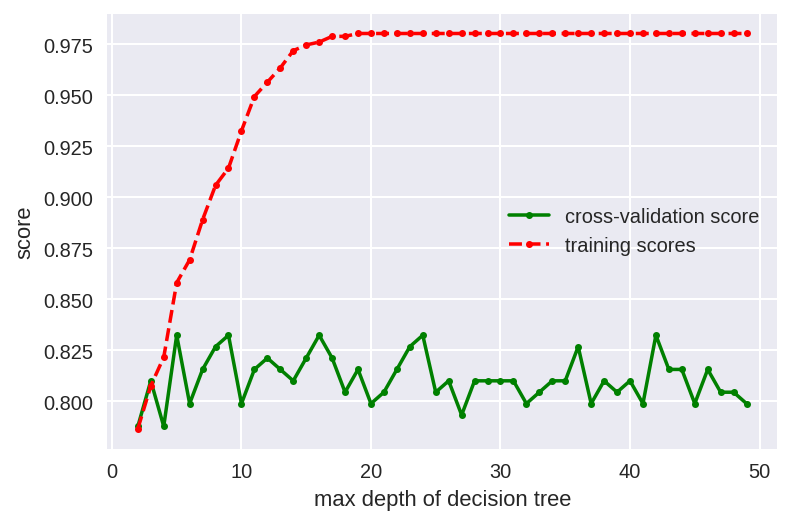

In [0]:
plt.figure(figsize=(6,4),dpi=144)
plt.grid(True)
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths,cv_scores,'.g-',label='cross-validation score')
plt.plot(depths,tr_scores,'.r--',label='training scores')
plt.legend()
#plt.show()

交叉验证查找最佳参数

In [0]:
def cv_score(val):
    clf=tree.DecisionTreeClassifier(criterion='gini',min_impurity_split=val)
    clf.fit(X_train,y_train)
    tr_score=clf.score(X_train,y_train)
    cv_score=clf.score(X_test,y_test)
    return (tr_score,cv_score)

vals=np.linspace(0,0.5,50)
scores=[cv_score(v) for v in vals]
tr_scores=[s[0] for s in scores]
cv_scores=[s[1] for s in scores]

best_score_index=np.argmax(cv_scores)
best_score=cv_scores[best_score_index]
best_param=vals[best_score_index]
print('best param {} best score {}'.format(best_param,best_score))

best param 0.22448979591836732 best score 0.8603351955307262


/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/s

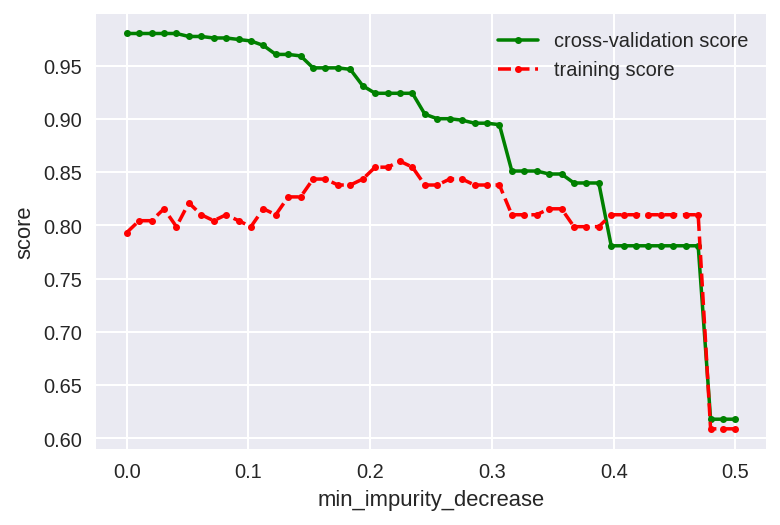

In [0]:
plt.figure(figsize=(6,4),dpi=144)
plt.grid(True)
plt.xlabel('min_impurity_decrease')
plt.ylabel('score')
plt.plot(vals,tr_scores,'.g-',label='cross-validation score')
plt.plot(vals,cv_scores,'.r--',label='training score')
plt.legend()

预测Kaggle平台给的测试集

In [0]:
test_X=read_dataset('test.csv')
#test_X=test_set.drop(['Survived'],axis=1).values
clf=tree.DecisionTreeClassifier(criterion='gini',min_impurity_split=0.2040816326530612,max_depth=13)
clf.fit(X,y)
test_y=clf.predict(test_X)

导出结果

In [0]:
df_test=pd.read_csv('test.csv')
df_test['Survived']=test_y.tolist()
df_result=df_test.loc[:,['PassengerId','Survived']]

from google.colab import files
with open('result.csv', 'w') as f:
  f.write('')
df_result.to_csv('result.csv',index=False)

files.download('result.csv')

上面的调参过程仍然有限麻烦，sklearn的网格搜索(GridSearch)可以实现自动化调参

In [0]:
from sklearn.model_selection import GridSearchCV
thresholds=np.linspace(0,0.5,50)
params={'min_impurity_split':thresholds}
clf=GridSearchCV(tree.DecisionTreeClassifier(),params,cv=5)
clf.fit(X,y)
print('\n\n\nbest_param:{}\nbest score: {}'.format(clf.best_params_,clf.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/s




best_param:{'min_impurity_split': 0.2040816326530612}
best score: 0.8215488215488216


/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/s